In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [38]:
data = pd.read_csv("all_23_solenoids.csv")

In [39]:
data.head()

,x,y,z,bx,by,bz,particle,energy,volume
0,-0.668430,-72.219501,-470.0,-0.017905,-1.934480,20.469558,pi-,203.317871,Solenoid_1_FieldVolume
1,-152.539995,201.956100,-470.0,-4.085955,5.409621,20.469558,pi+,705.753527,Solenoid_1_FieldVolume
2,62.310662,22.423425,380.0,1.669061,0.600637,20.469558,pi+,670.797544,Solenoid_1_FieldVolume
3,73.323506,82.731281,4215.5,0.775573,0.875083,7.872907,pi+,669.990539,Solenoid_1_FieldVolume
4,-16.982166,-46.422335,-470.0,-0.454886,-1.243474,20.469558,pi-,220.908655,Solenoid_1_FieldVolume


In [40]:
z = np.array(data['z'].to_list())
bz = np.array(data['bz'].to_list())
bx = np.array(data['bx'].to_list())
by = np.array(data['by'].to_list())
b_mod = np.array(np.sqrt(bx**2 + by**2 + bz**2))
particles = np.array(data['particle'].to_list())
energy = np.array(data['energy'].to_list())
print(b_mod
     )

[20.56077183 21.56297364 20.546273   ... 20.47023225  7.93780835
  3.19898773]


In [41]:
len(bz), len(z)

(88609, 88609)

In [42]:
bin_size = 800  # mm
z_min = np.min(z)
z_max = np.max(z)

bin_edges = np.arange(z_min, z_max + bin_size, bin_size)

peak_bz = []
bin_centers = []

# Loop through bins
for i in range(len(bin_edges) - 1):
    z_start = bin_edges[i]
    z_end = bin_edges[i + 1]
    
    # Get indices within the bin
    mask = (z >= z_start) & (z < z_end)
    
    if np.any(mask):
        peak = np.max(np.abs(bz[mask]))
        peak_bz.append(peak)
        bin_centers.append((z_start + z_end) / 2)




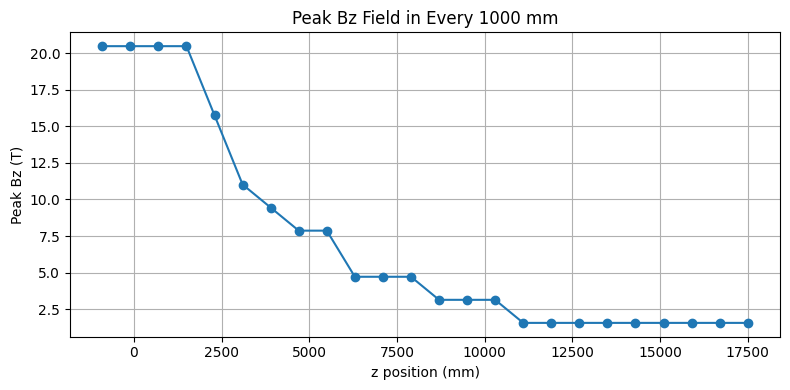

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, peak_bz, marker='o', linestyle='-')
plt.xlabel('z position (mm)')
plt.ylabel('Peak Bz (T)')
plt.title('Peak Bz Field in Every 1000 mm')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
pi_plus_pos = []
pi_plus_energy = []
pi_minus = []
mu_plus = []
mu_minus = []
for i in range(0, len(particles)):
    if particles[i] == "pi+":
        pi_plus_energy.append(energy[i])
        pi_plus_pos.append(z[i])

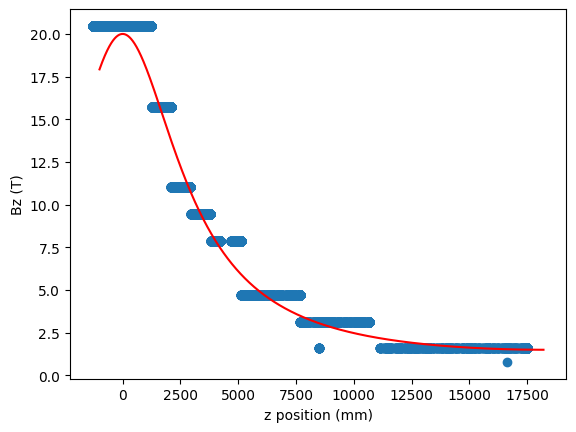

In [45]:
Bi = 20
Bf = 1.5
Lt = 18200
# -1< z < Lt
B = []

z_list = [i for i in range(-1000, 18201)] 

for zi in z_list:
    B_temp = (Bi*Bf*(Lt**3))/(Bi*(zi**2)*(3*Lt-2*zi)+Bf*((Lt-zi)**2)*(2*zi+Lt))
    B.append(B_temp)
    
plt.plot(z_list, B, color='red', label='Original Points')
plt.scatter(z, bz, marker='o', linestyle='-')
#plt.plot(bin_centers, peak_bz, marker='o', linestyle='-')
plt.xlabel('z position (mm)')
plt.ylabel('Bz (T)')
#plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.show()

In [46]:
data = pd.read_csv("6D_vector.csv")
data.head()

,Detector,ParticleType,x[cm],px[MeV/c],y[cm],py[MeV/c],z[cm],pz[MeV/c],TotalEnergy[MeV]
0,1,pi+,11.59970,94.1907,6.07884,-48.49680,450.95,646.548,530.301
1,1,pi+,5.22458,-59.4028,-3.61257,-132.63200,450.95,669.124,559.233
2,2,mu+,9.74411,34.5147,4.67010,-90.50530,1097.45,582.458,494.178
3,1,pi-,-0.77924,-48.0915,9.36816,48.18920,450.95,716.127,593.200
4,2,pi-,-2.08608,69.0036,-2.92272,-7.04966,1097.45,713.745,590.994


In [47]:
det = np.array(data['Detector'].to_list())
particle = np.array(data['ParticleType'].to_list())
px = np.array(data['px[MeV/c]'].to_list())
py = np.array(data['py[MeV/c]'].to_list())
pz = np.array(data['pz[MeV/c]'].to_list())
x = np.array(data['x[cm]'].to_list())
y = np.array(data['y[cm]'].to_list())
z = np.array(data['z[cm]'].to_list())
det1_particles = []
det1_px = []
det1_py = []
det1_pz = []
det1_x = []
det1_y = []
det1_z = []
det2_particles = []
det2_px = []
det2_py = []
det2_pz = []
det2_x = []
det2_y = []
det2_z = []
det3_particles = []
det3_px = []
det3_py = []
det3_pz = []
det3_x = []
det3_y = []
det3_z = []

In [48]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
        det1_px.append(px[i])
        det1_py.append(py[i])
        det1_pz.append(pz[i])
        det1_x.append(x[i])
        det1_y.append(y[i])
        det1_z.append(z[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
        det2_px.append(px[i])
        det2_py.append(py[i])
        det2_pz.append(pz[i])
        det2_x.append(x[i])
        det2_y.append(y[i])
        det2_z.append(z[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])
        det3_px.append(px[i])
        det3_py.append(py[i])
        det3_pz.append(pz[i])
        det3_x.append(x[i])
        det3_y.append(y[i])
        det3_z.append(z[i])

len(det3_particles)

4021

In [49]:
from collections import Counter

counts = Counter(det1_particles)
categories1 = list(counts.keys())
values1 = list(counts.values())


In [50]:
counts = Counter(det2_particles)
categories2 = list(counts.keys())
values2 = list(counts.values())

In [51]:
counts = Counter(det3_particles)
categories3 = list(counts.keys())
values3 = list(counts.values())

In [52]:
 len(det3_particles)

4021

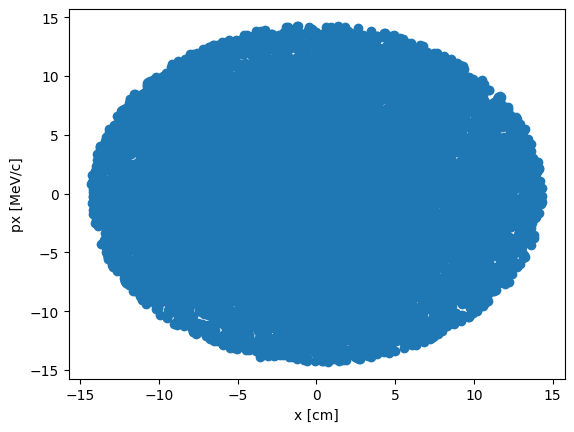

In [53]:

plt.scatter(det1_x,det1_y )
plt.xlabel("x [cm]")
plt.ylabel("px [MeV/c]")
plt.show()

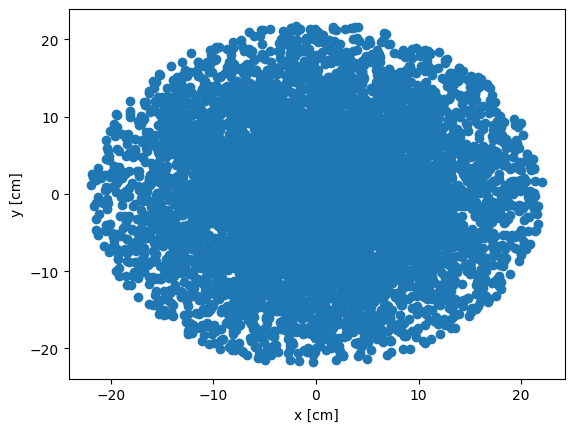

In [54]:
plt.scatter(det2_x,det2_y )
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.show()

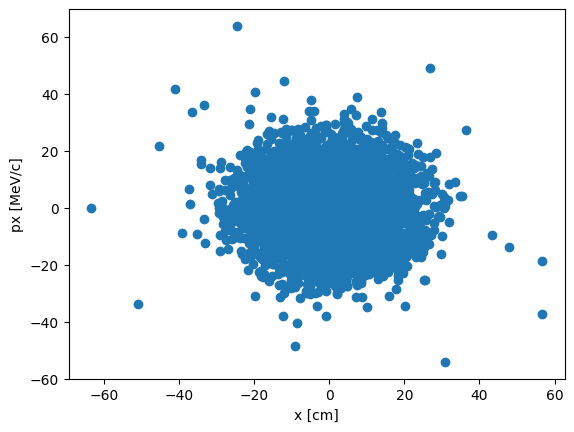

In [55]:
plt.scatter(det3_x,det3_y )
plt.xlabel("x [cm]")
plt.ylabel("px [MeV/c]")
plt.show()

In [56]:
def compute_and_plot_emittance(x_list, px_list, pz_list):
    # Convert lists to numpy arrays
    x = np.array(x_list)
    px = np.array(px_list)
    pz = np.array(pz_list)
    
    # Compute x' = px / pz
    xp = px / pz

    # Center data
    x_mean = np.mean(x)
    xp_mean = np.mean(xp)
    x_c = x - x_mean
    xp_c = xp - xp_mean

    # Compute statistical moments
    x2 = np.mean(x_c**2)
    xp2 = np.mean(xp_c**2)
    xxp = np.mean(x_c * xp_c)

    # Calculate geometric emittance
    emittance = np.sqrt(x2 * xp2 - xxp**2)
    print(f"Geometric Emittance: {emittance:.3e} mm")

    # Plotting phase space
    
    plt.scatter(x, xp)
    plt.xlabel("x [mm]")
    plt.ylabel("x' [rad]")
    plt.title("Transverse Phase Space (x vs x')")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return emittance

In [57]:
det_pos = [4, 10.5, 17.5] # in meters

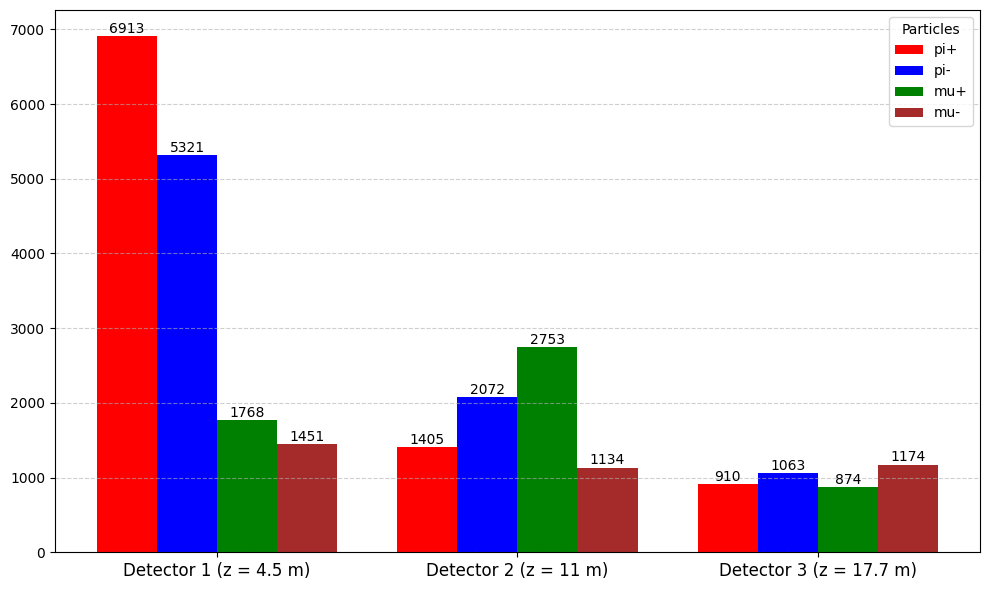

In [58]:
colors = ['red', 'blue', 'green', 'brown']

# Number of sets
n_sets = 3
x = np.arange(n_sets)  # One x-position per set
width = 0.2            # Width of each bar

plt.figure(figsize=(10, 6))

# Keep track of all BarContainers so we can annotate them afterward
all_bars = []

for i, (particle, color) in enumerate(zip(categories1, colors)):
    values = [values1[i], values2[i], values3[i]]
    bars = plt.bar(x + i * width, values, width=width, label=particle, color=color)
    all_bars.append(bars)

# Annotate each bar with its height
for bars in all_bars:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position: center of the bar
            height + 1,                         # y position: just above the bar
            f'{int(height)}',                   # the label
            ha='center', va='bottom',
            fontsize=10                          # tweak as needed
        )

# X-axis setup
plt.xticks(
    x + width * 1.5,
    ['Detector 1 (z = 4.5 m)', 'Detector 2 (z = 11 m)', 'Detector 3 (z = 17.7 m)'],
    fontsize=12,
)

plt.legend(title='Particles')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [59]:
len(det1_x)

15453

In [60]:
len(det2_x)

7364

In [61]:
len(det3_x)

4021

In [220]:
import math
def finiteSolenoid(rho):
    length = 83 #cm
    current = 62000 # Ampere
    coil = 260 # number of turns
    radius = 70 # coil radiius in cm
    N = coil/length 
    z1 = -length/2
    z2 = +length/2
    F = lambda zi:zi/math.sqrt(radius*radius+rho*rho+zi*zi)
    mu0 = 4*3.14*1e-7
    return mu0*N*current*(F(z2)-F(z1))
    

In [223]:
rho_list = []
for i in range(0,70):
    for j in range(0,70):
        rho_list.append(math.sqrt(i*i+j*j))

B = []
for rho in rho_list:
    B.append(finiteSolenoid(rho)*100)

In [226]:
print(finiteSolenoid(0)*100)

24.880086783381554


In [235]:
z = [i for i in range(0,100)]
Bz = [] #rho = 0 
rho = 0

In [238]:
def field():
    mu0 = 4*3.14*1e-7
    N = 260/100
    I = 61120
    return mu0*N*I

In [239]:
def fringeFieldFactor(z):
    z1 = 0
    z2 = 100
    fringeWidth = 70
    if z<z1-fringeWidth or z>z2+fringeWidth:
        return 0.0
    elif z>=z1 and z<=z2:
        return 1.0

    else: 
        #Smooth transition in fringe regions using hyperbolic tangent
        if (z < z1) :
            s = (z - z1 + fringeWidth) / (2.0 * fringeWidth)
            return 0.5 * (1.0 + math.tanh(2 * (s - 0.5)))
        else :
             s = (z2 + fringeWidth - z) / (2.0 * fringeWidth)
             return 0.5 * (1.0 + math.tanh(2 * (s - 0.5)))

In [242]:
def calculate_fringe_field(rho, z, fBz0):
    """
    Calculates the magnetic field components [Br, Bphi, Bz, Ex, Ey, Ez]
    at a given (rho, z) in the solenoid with a tapered aperture.
    """
    ff = fringeFieldFactor(z)

    # No field in far fringes or outside aperture
    if ff<=0:
        return 0

    # Axial field component with fringe taper
    Bz = fBz0 * ff

    return Bz


In [245]:
fBz0 = field()
for zi in z:
    Bz.append(calculate_fringe_field(0,zi, fBz0))

In [246]:
Bz

[0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199593472,
 0.199